# https://www.kaggle.com/code/kaushiksuresh147/doge-coin-to-moon-eda-and-prediction


What Prophet doesnt do:

1. Prophet does not allow non-Gaussian noise distribution:
In Prophet, noise distribution is always Gaussian and pre-transformation of y values is the only way to handle the values following skewed distribution.

2. Prophet does not take autocorrelation on residual into account:
Since epsilon noise portion in the formula assume i.i.d. normal distribution, the residual is not assumed to have autocorrelation, unlike ARIMA model.

3. Prophet does not assume stochastic trend:
Prophet’s trend component is always deterministic+possible changepoints and it won’t assume stochastic trend unlike ARIMA.


In [1]:
# !pip install -q condacolab–

In [2]:
# import condacolab
# condacolab.install()

In [1]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install ephem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.9 MB/s eta 0:00:00


In [4]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install -U networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime

#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.BLACK

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [9]:
# Importing of Data 
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data=pd.read_csv('DOGE-USD-2017-2023.csv')

/content/DOGE-USD-mar-apr-2023.csv
/content/DOGE-USD-2017-2023.csv
/content/DOGE-USD-feb-apr-2023.csv
/content/DOGE-USD-2022-2023.csv
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/configurations/config_default
/content/.config/logs/2023.04.14/13.33.23.944257.log
/content/.config/logs/2023.04.14/13.34.46.037681.log
/content/.config/logs/2023.04.14/13.34.21.160489.log
/content/.config/logs/2023.04.14/13.33.49.775521.log
/content/.config/logs/2023.04.14/13.34.12.944578.log
/content/.config/logs/2023.04.14/13.34.45.328952.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


In [10]:
print(f"{m_}Total records:{y_}{data.shape}\n")
print(f"{m_}Data types of data columns: \n{y_}{data.dtypes}")

Total records:(1973, 7)

Data types of data columns: 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [11]:
data.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [12]:
data['Date'] = pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
data.sort_values(by='Date',inplace=True)
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-20,0.001374,0.001428,0.001348,0.001394,0.001394,2141360.0
1,2017-11-21,0.001410,0.001446,0.001302,0.001389,0.001389,3047660.0
2,2017-11-22,0.001401,0.002053,0.001373,0.001823,0.001823,18841700.0
3,2017-11-23,0.001819,0.002246,0.001819,0.001891,0.001891,26126500.0
4,2017-11-24,0.001940,0.001978,0.001788,0.001908,0.001908,9585960.0
5,2017-11-25,0.001923,0.002072,0.001877,0.002072,0.002072,5430930.0
6,2017-11-26,0.002073,0.002132,0.001880,0.002026,0.002026,7670430.0
7,2017-11-27,0.001999,0.002036,0.001891,0.001988,0.001988,6185790.0
8,2017-11-28,0.001991,0.002363,0.001949,0.002363,0.002363,8317540.0
9,2017-11-29,0.002333,0.002581,0.001993,0.002080,0.002080,11077200.0


In [13]:
prev_len = data.shape[0]
print(f"{m_}Total records: {y_}{data.shape[0]}\n")
print(f"{m_}Total records with missing values: {y_}{data.isna().sum().sum()}\n")
# data=data.dropna()

# Drop Null Values
data = data.dropna().reset_index(drop=True)
print(f"{m_}Total records after the removal of NA values: {y_}{data.shape[0]}\n")
print(f"{m_}Removed records:{y_}{prev_len-data.shape[0]}\n")
print(f"{m_}Removed records percentage:{y_}{round(((prev_len-data.shape[0])/prev_len)*100,2)}")

Total records: 1973

Total records with missing values: 6

Total records after the removal of NA values: 1972

Removed records:1

Removed records percentage:0.05


In [14]:
# Check to make sure there aren't any NULL values at all to avoid issues later
data.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [15]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1967,2023-04-10,0.083297,0.085272,0.082470,0.084852,0.084852,473882914.0
1968,2023-04-11,0.084851,0.085710,0.083899,0.084237,0.084237,472611203.0
1969,2023-04-12,0.084237,0.084429,0.081319,0.083433,0.083433,540510658.0
1970,2023-04-13,0.083428,0.088381,0.083020,0.087484,0.087484,810485328.0
1971,2023-04-15,0.088844,0.090427,0.087727,0.088767,0.088767,463748608.0


In [16]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(8,16),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()


<ipython-input-16-ef071332cd40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


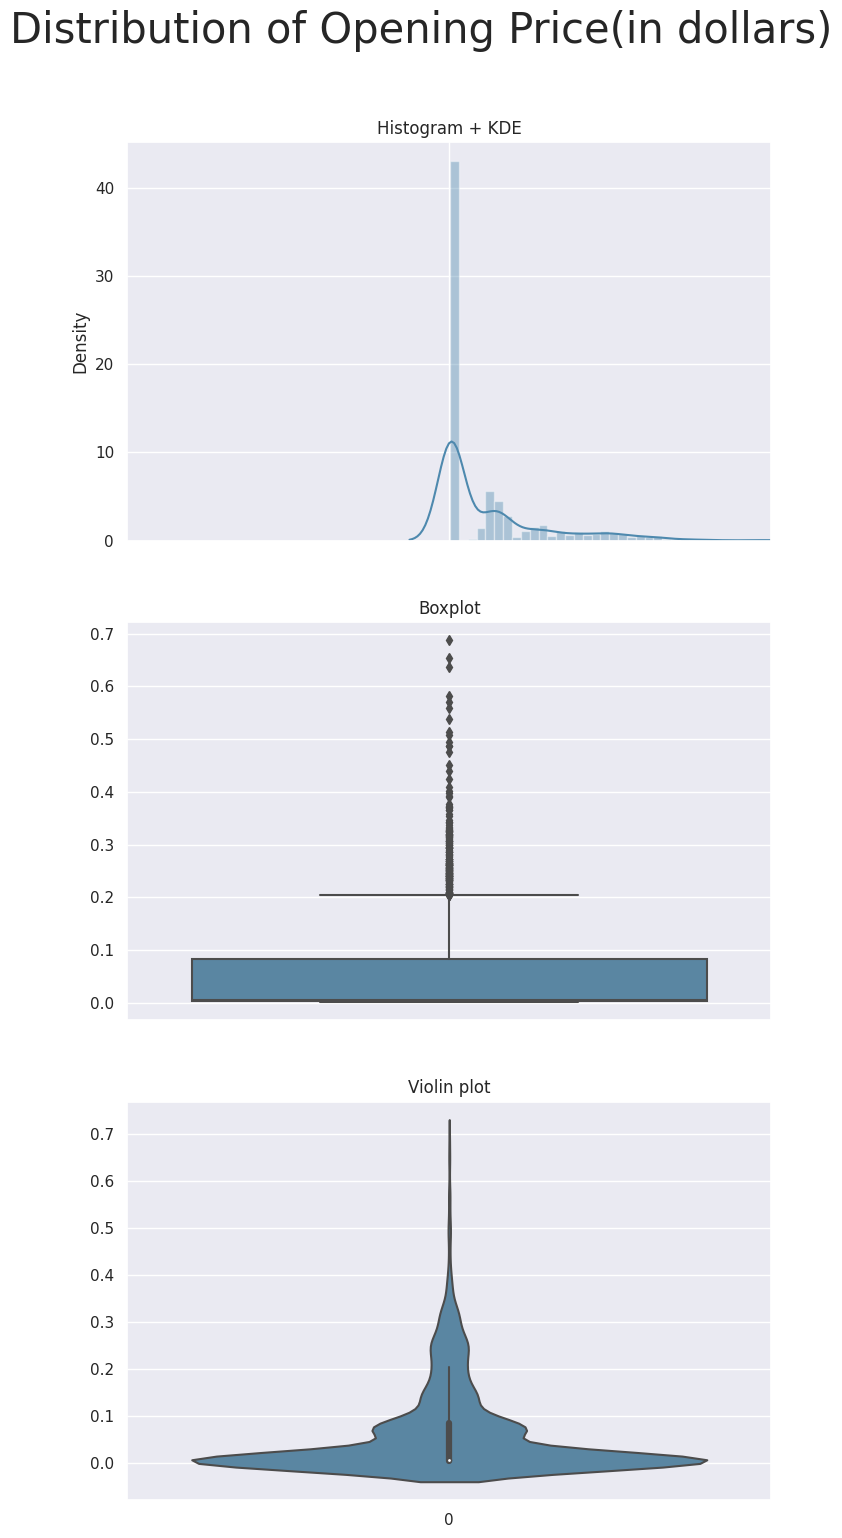

In [21]:
# Distribution of Opening price using triple_plot
triple_plot(data['Open'],'Distribution of Opening Price(in dollars)',custom_colors[0])

<Axes: xlabel='Open', ylabel='Density'>

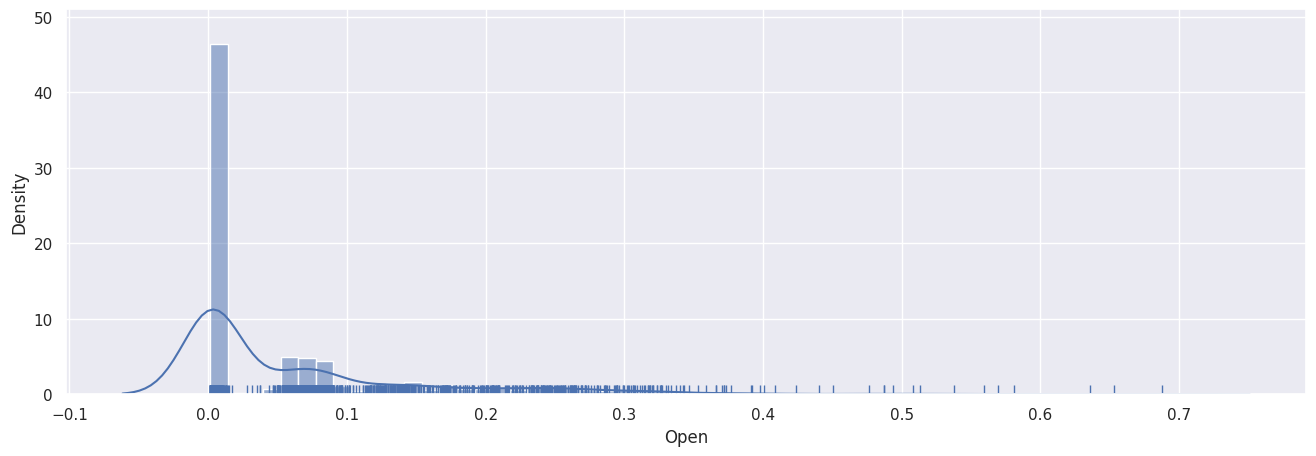

In [107]:
# More controlled code for Histogram
# Notice how the KDE curve spills out past the histogram in distplot, but only covers the actual range of the data in histplot. 
# This behavior can be controlled with the cut parameter, which you'd need to pass through using kde_kws. 
# The histplot default is 0, while the distplot default is 3 (the units are multiples of the kernel bandwidth):

sns.histplot(
    data['Open'], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.rugplot(data['Open'])

<Axes: >

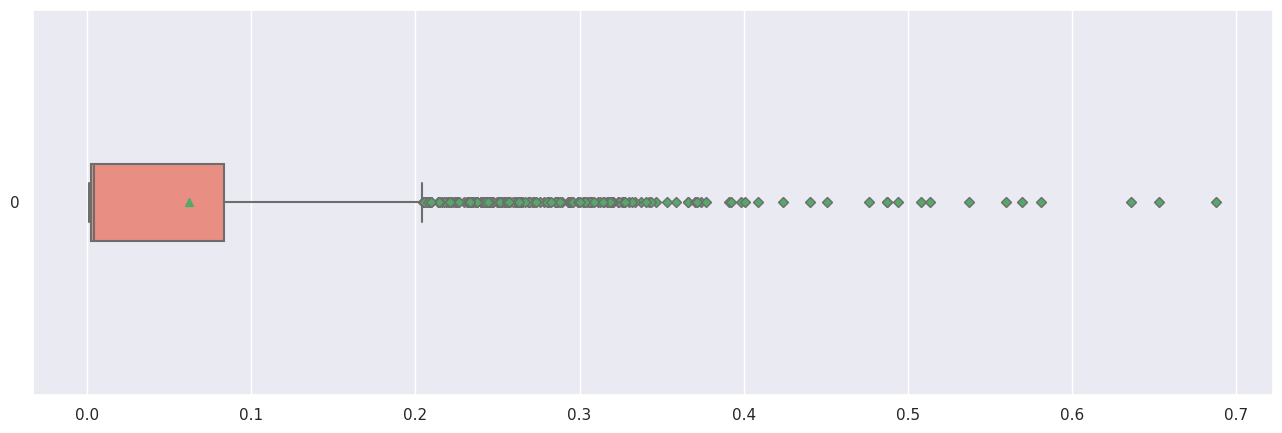

In [114]:
# Boxplot for opening prices
# We have to use Matplotlib for the boxplot since sns Seaborn is not functioning
# boxplot() exampls: 
#   matplot:    https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
#   seaborn:    https://seaborn.pydata.org/generated/seaborn.boxplot.html
# hide outliers: showfliers=False
# There is a way to have ultiple samples with difference sizes on the same box plot
green_diamond = dict(markerfacecolor='g', marker='D')
sns.boxplot(data['Open'], showmeans=True, orient='h', 
            flierprops=green_diamond, width=0.2, color='salmon')

<Axes: >

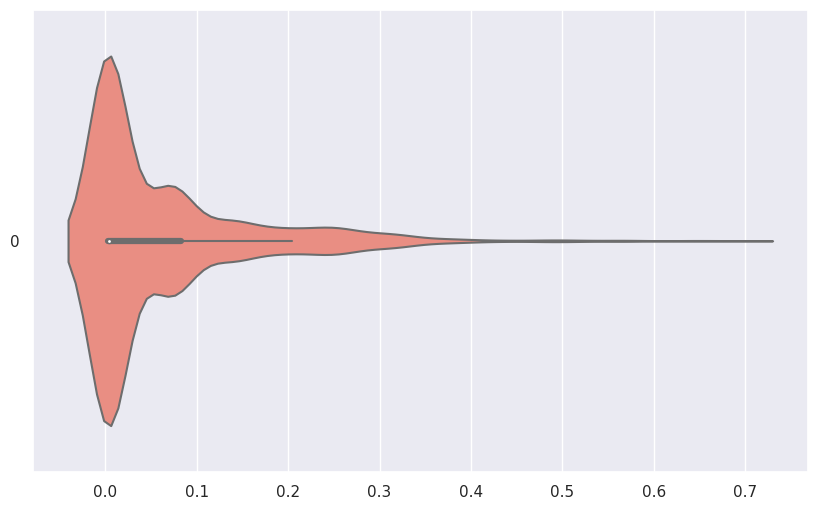

In [22]:
# Violin Plot for Open prices
# orient = 'h','v'
 # syntax for violin plot: https://datagy.io/seaborn-violinplot/
sns.violinplot(data['Open'], inner='box', orient='h', color='salmon')

<ipython-input-17-ef071332cd40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


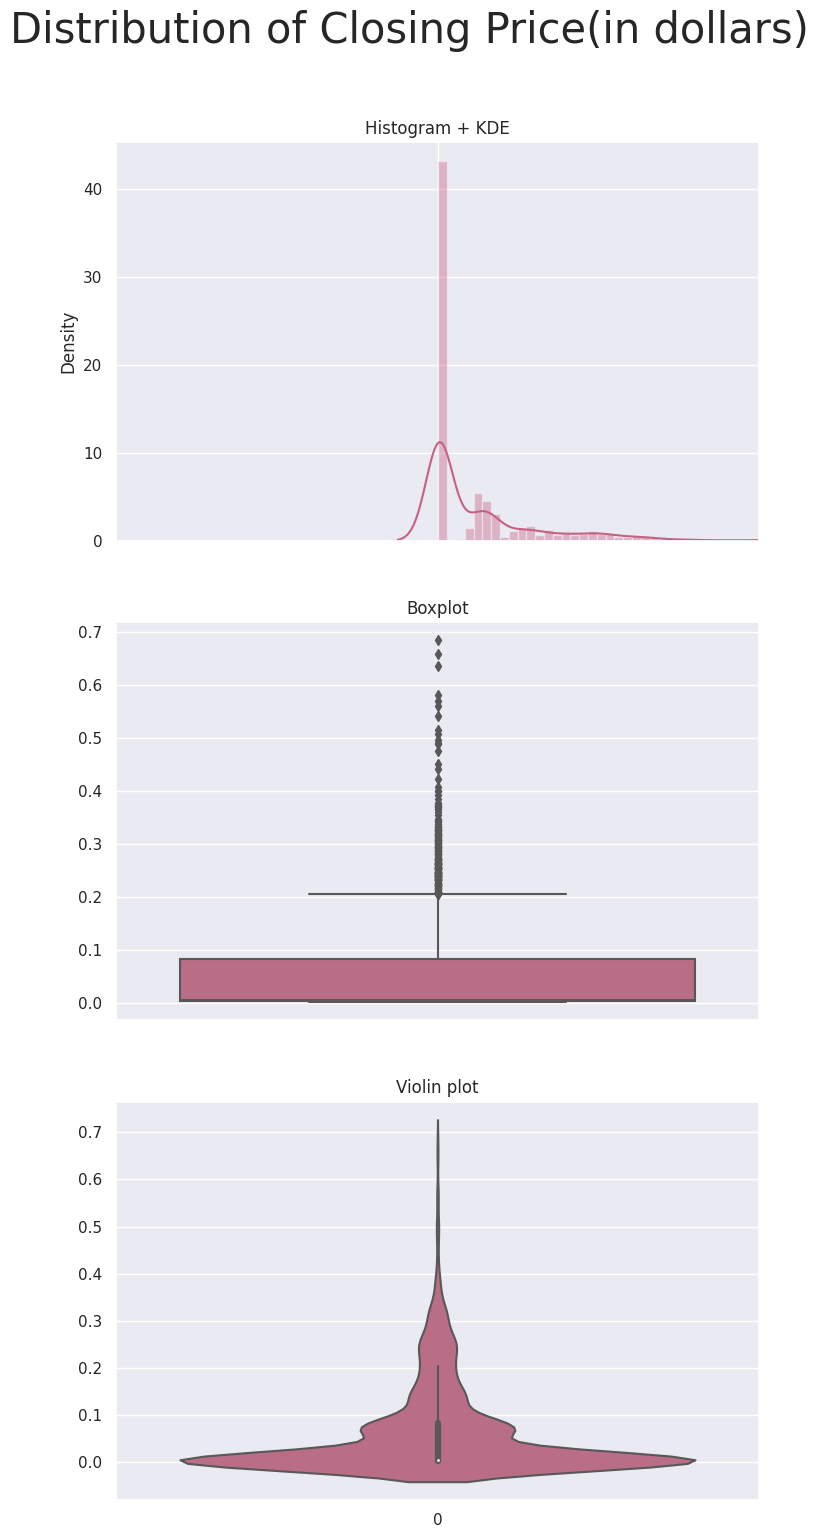

In [23]:
# Distribution of Closing Price using triple_plot
triple_plot(data['Close'],'Distribution of Closing Price(in dollars)',custom_colors[1])

<Axes: xlabel='Close', ylabel='Density'>

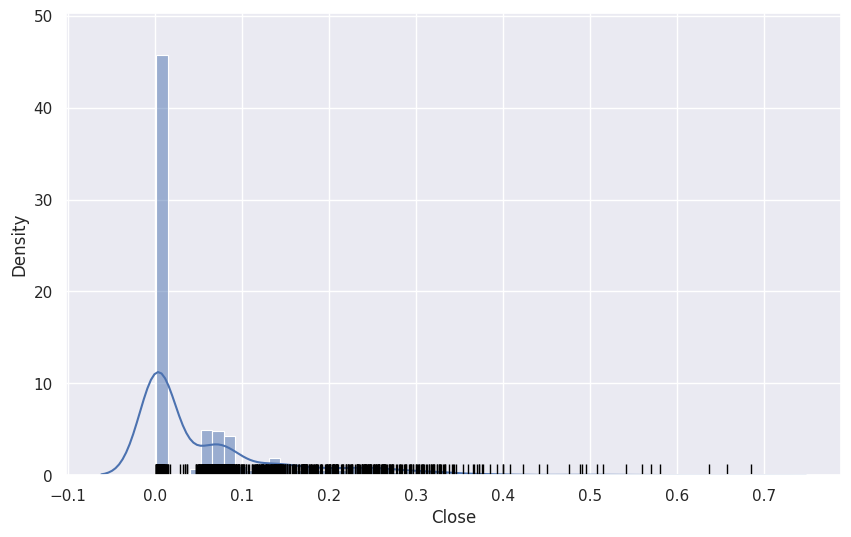

In [31]:
# Distribution of Closing Price

sns.histplot(
    data['Close'], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.rugplot(data['Close'], color='black')


<Axes: >

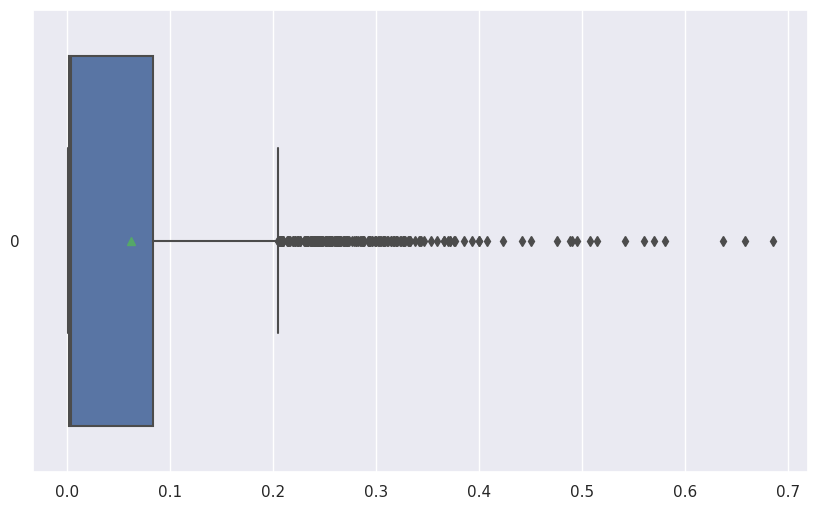

In [32]:
# Boxplot for closing prices
# We have to use Matplotlib for the boxplot since sns Seaborn is not functioning
sns.boxplot(data['Close'], showmeans=True, orient='h')

<Axes: >

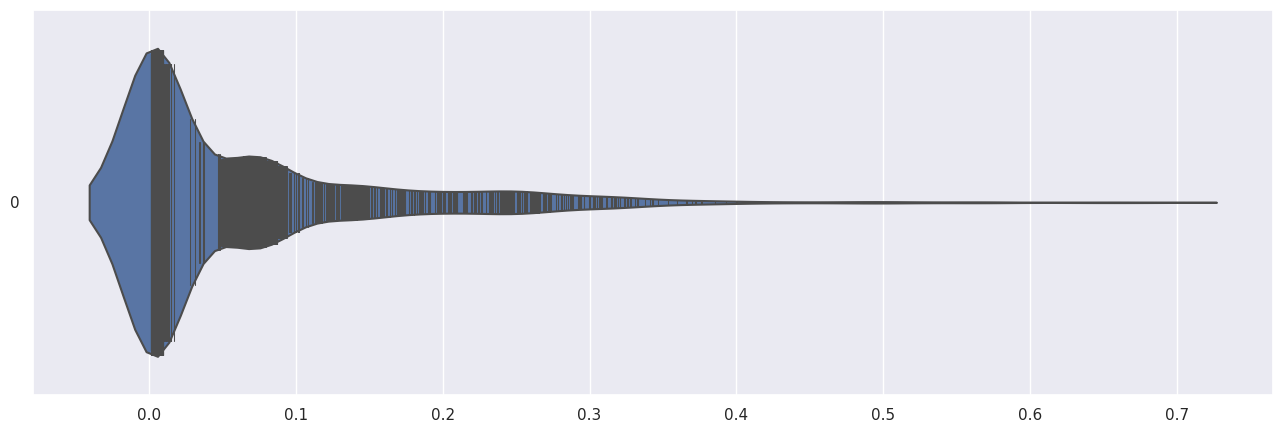

In [115]:
# Violin Plot

sns.violinplot(data['Close'], inner='stick', orient='h')

<ipython-input-16-ef071332cd40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


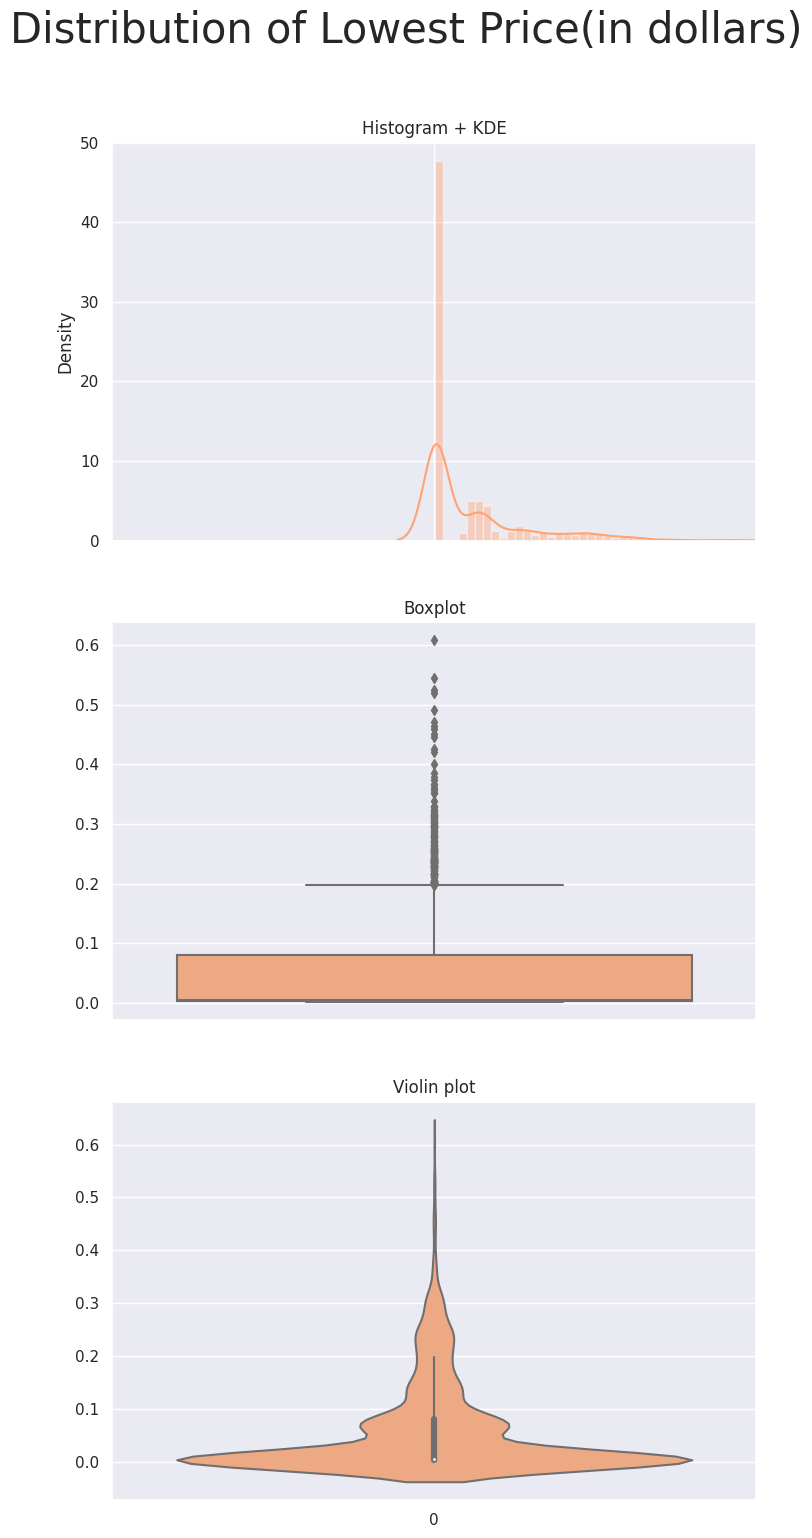

In [34]:
# Distribution of Low Price
triple_plot(data['Low'],'Distribution of Lowest Price(in dollars)',custom_colors[3])

<Axes: xlabel='Low', ylabel='Density'>

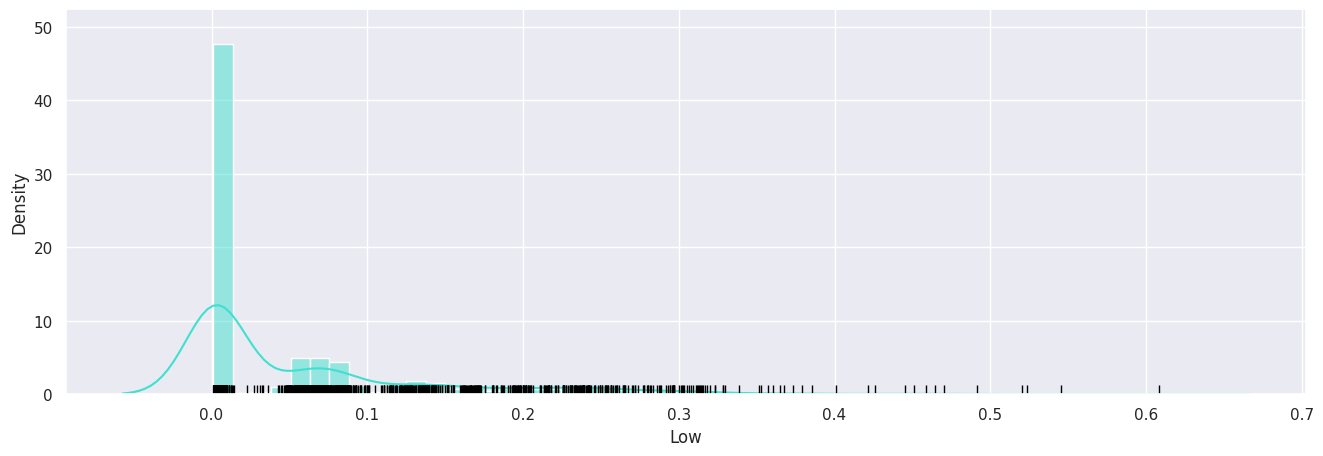

In [35]:
# Distribution of Closing Price

# set the size of the figure
sns.set(rc={'figure.figsize':(16,5)})
sns.histplot(data['Low'], kde=True, stat="density", kde_kws=dict(cut=3), color='turquoise')
sns.rugplot(data['Low'], color='black')

<Axes: >

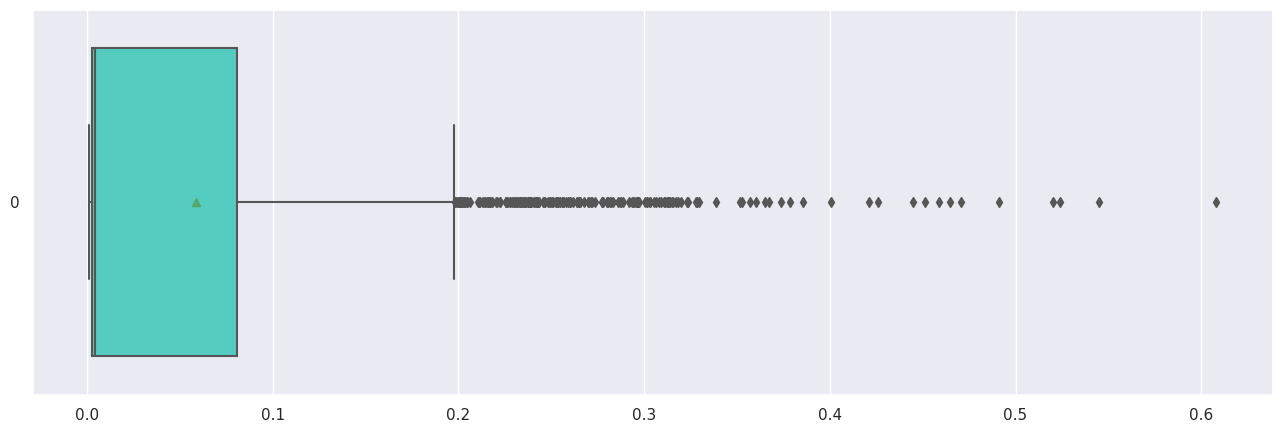

In [36]:
# Boxplot for Low prices
# We have to use Matplotlib for the boxplot since sns Seaborn is not functioning
sns.boxplot(data['Low'], showmeans=True, orient='h', color='turquoise')

<Axes: >

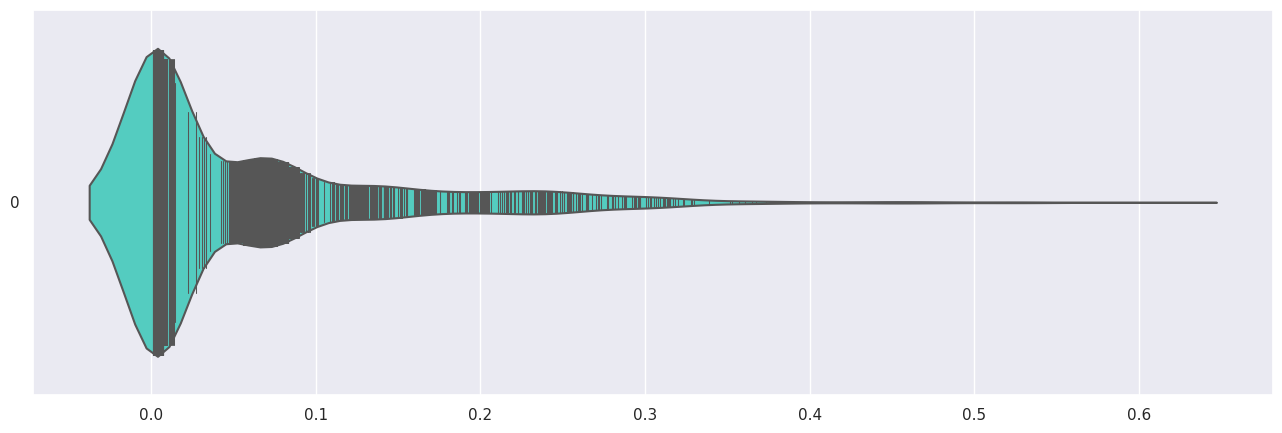

In [37]:
# Violin Plot for Low prices
# set the size of the figure
# sns.set(rc={'figure.figsize':(5,10)})
sns.violinplot(data['Low'], inner='stick', orient='h', color='turquoise')

<ipython-input-16-ef071332cd40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[0],color=c)


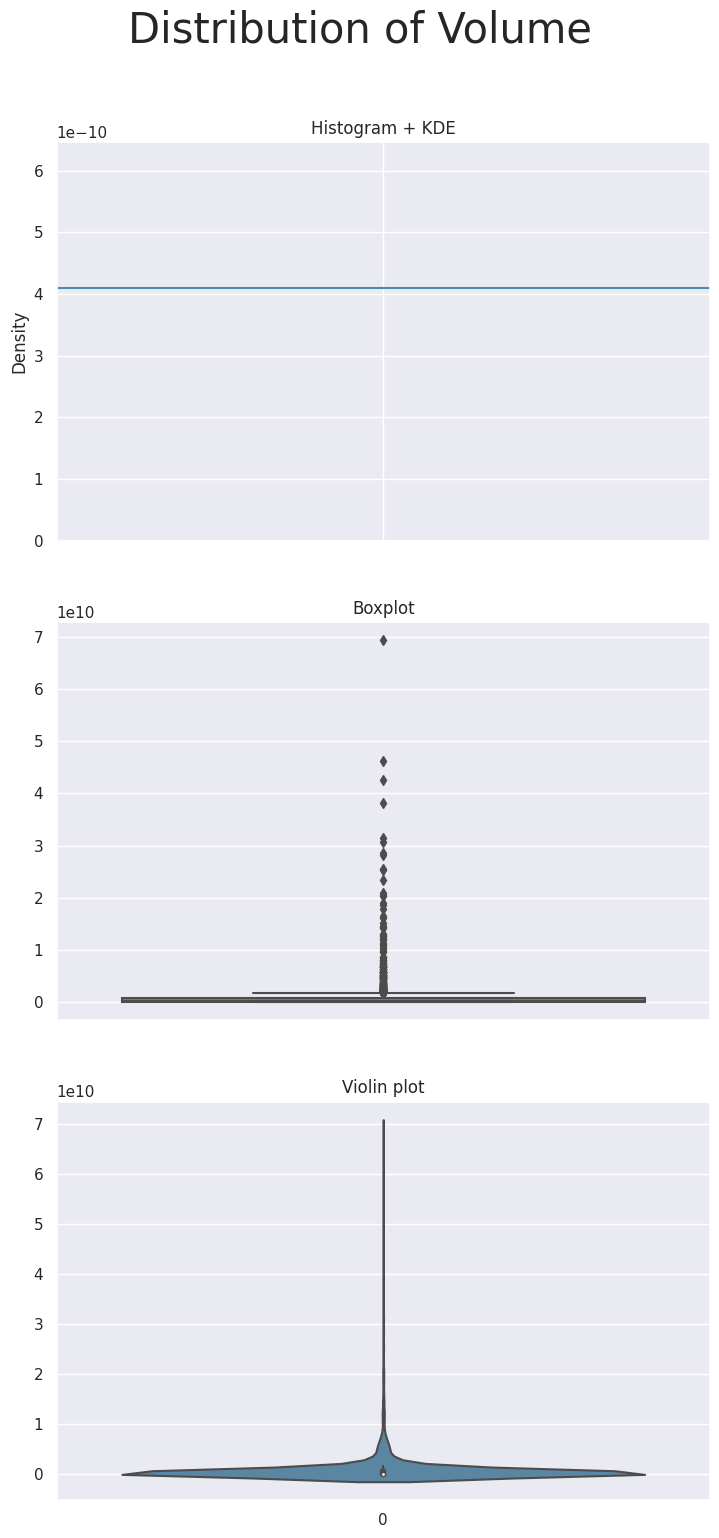

In [38]:
# set the size of the figure
triple_plot(data['Volume'],'Distribution of Volume',custom_colors[0])

<Axes: >

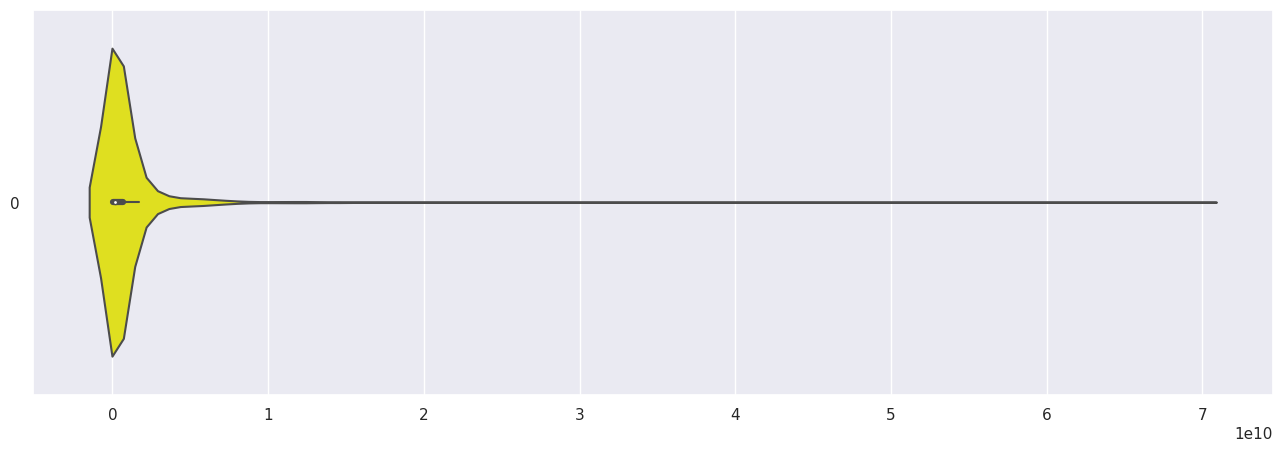

In [126]:
# Violin Plot for the Volume
# set the size of the figure
# sns.set(rc={'figure.figsize':(,6)})
sns.violinplot(data['Volume'], inner='box', orient='h', color='yellow')

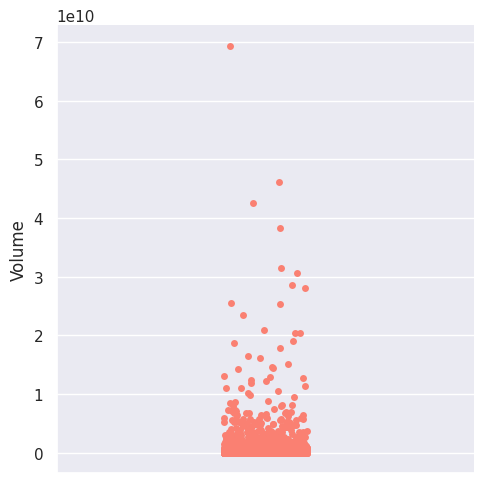

In [26]:
sns.catplot(data['Volume'], color='salmon')

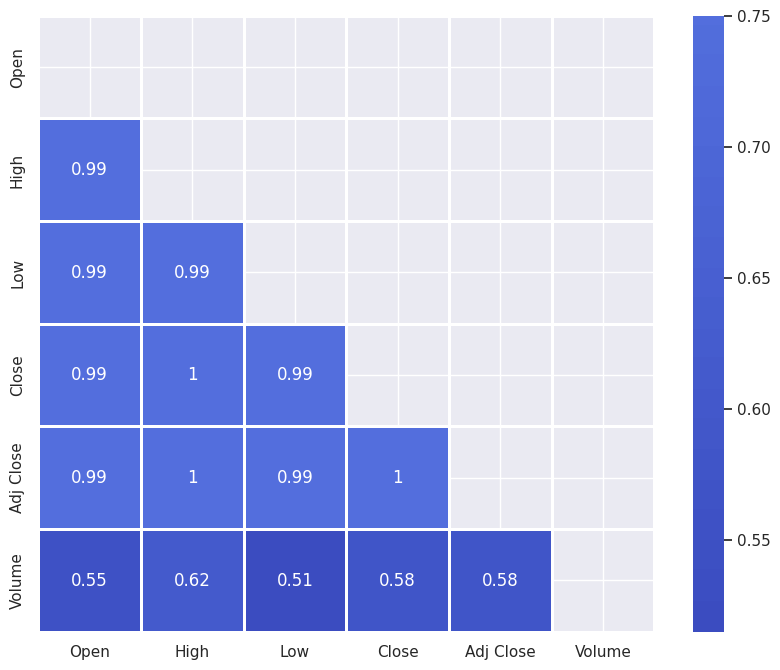

In [43]:
plt.figure(figsize=(10,8))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.75, center=2,
            square=True, linewidths=.8,annot=True)
plt.show()

In [44]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_array(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])



In [45]:
# Show edges in a table form
G.edges(data=True)



EdgeDataView([('Open', 'Open', {'weight': 1.0}), ('Open', 'High', {'weight': 0.9937542083893297}), ('Open', 'Low', {'weight': 0.9936446643561676}), ('Open', 'Close', {'weight': 0.9924063484320746}), ('Open', 'Adj Close', {'weight': 0.9924063484320746}), ('Open', 'Volume', {'weight': 0.5500322146842548}), ('High', 'High', {'weight': 1.0}), ('High', 'Low', {'weight': 0.9862803566986081}), ('High', 'Close', {'weight': 0.9950423610482511}), ('High', 'Adj Close', {'weight': 0.9950423610482511}), ('High', 'Volume', {'weight': 0.6158218752150324}), ('Low', 'Low', {'weight': 1.0}), ('Low', 'Close', {'weight': 0.9944856735772896}), ('Low', 'Adj Close', {'weight': 0.9944856735772896}), ('Low', 'Volume', {'weight': 0.5148276752646922}), ('Close', 'Close', {'weight': 1.0}), ('Close', 'Adj Close', {'weight': 1.0}), ('Close', 'Volume', {'weight': 0.584319773443634}), ('Adj Close', 'Adj Close', {'weight': 1.0}), ('Adj Close', 'Volume', {'weight': 0.584319773443634}), ('Volume', 'Volume', {'weight': 1

In [46]:

def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(7,7))

    nx.draw_networkx_nodes(H,positions,node_color='gold',nodelist=nodelist,
                       node_size=tuple([x**4.20 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=12)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='dotted',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    
    plt.axis('on')
    fig = plt.figure()


    plt.show() 

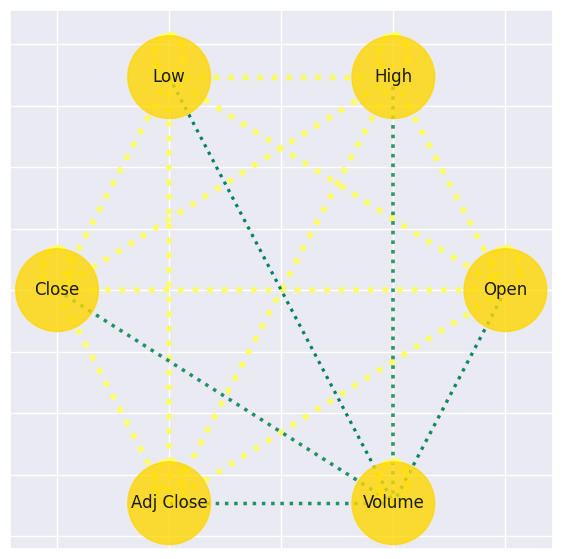

<Figure size 1600x500 with 0 Axes>

In [49]:
corr_network(G, corr_direction="positive", min_correlation = 0.5)

In [50]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])])
fig.show()

In [52]:
data['year']=data['Date'].dt.year
fig = go.Figure(data=[go.Candlestick(x=data['year'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])])
fig.show()

In [53]:
data['month']=data['Date'].dt.month
fig = go.Figure(data=[go.Candlestick(x=data['month'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])])
fig.show()

In [54]:
# price difference for week
data['week']=data['Date'].dt.week
fig = go.Figure(data=[go.Candlestick(x=data['week'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])])
fig.show()

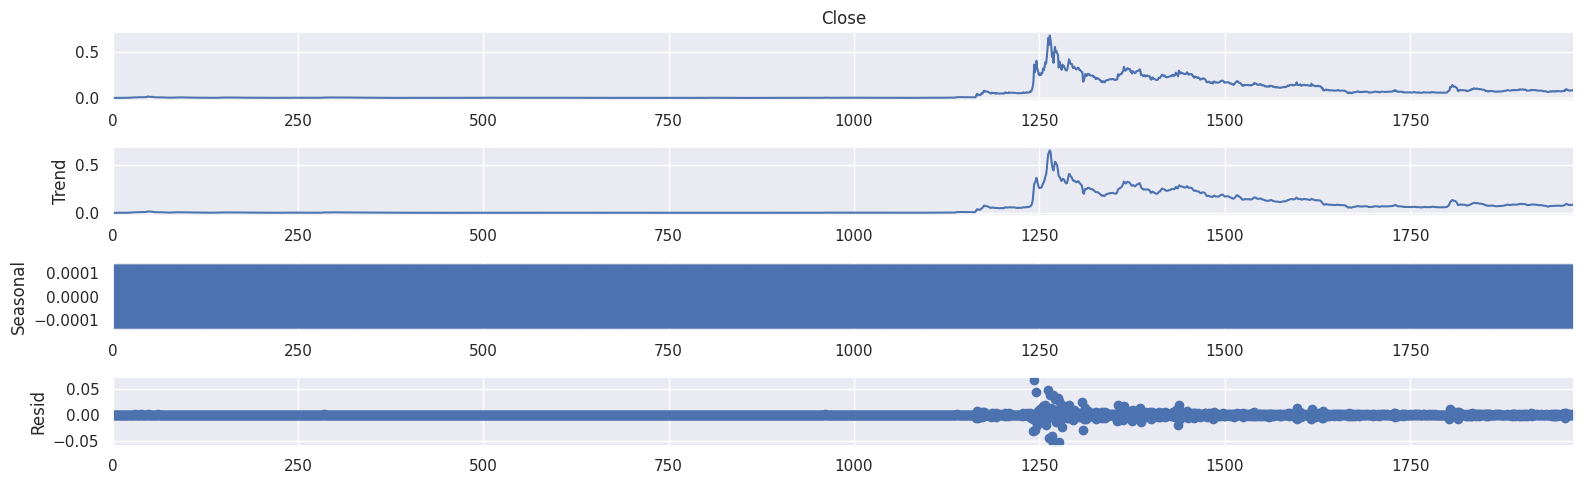

<Figure size 1500x1200 with 0 Axes>

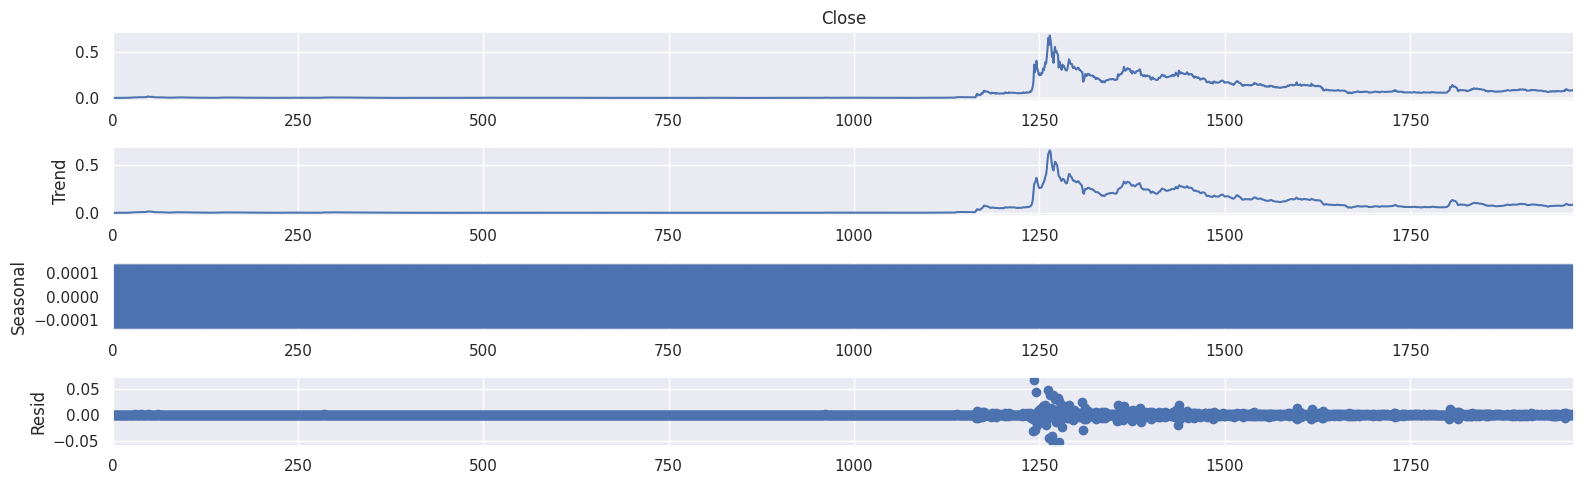

In [63]:
plt.figure(figsize=(15,12))
series = data.Close
result = seasonal_decompose(series, model='additive',period=2)
result.plot()

In [64]:
# Renaming the column names accroding to Prophet's requirements
prophet_df=data[['Date','Close']]
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

<ipython-input-64-9b0909a0ee05>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/bng60vog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/2t378953.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28941', 'data', 'file=/tmp/tmp7wkv3246/bng60vog.json', 'init=/tmp/tmp7wkv3246/2t378953.json', 'output', 'file=/tmp/tmp7wkv3246/prophet_modelylopzp1d/prophet_model-20230418011135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:11:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(5)


,ds
2267,2024-02-05
2268,2024-02-06
2269,2024-02-07
2270,2024-02-08
2271,2024-02-09


In [68]:
forecast=prophet_basic.predict(future)

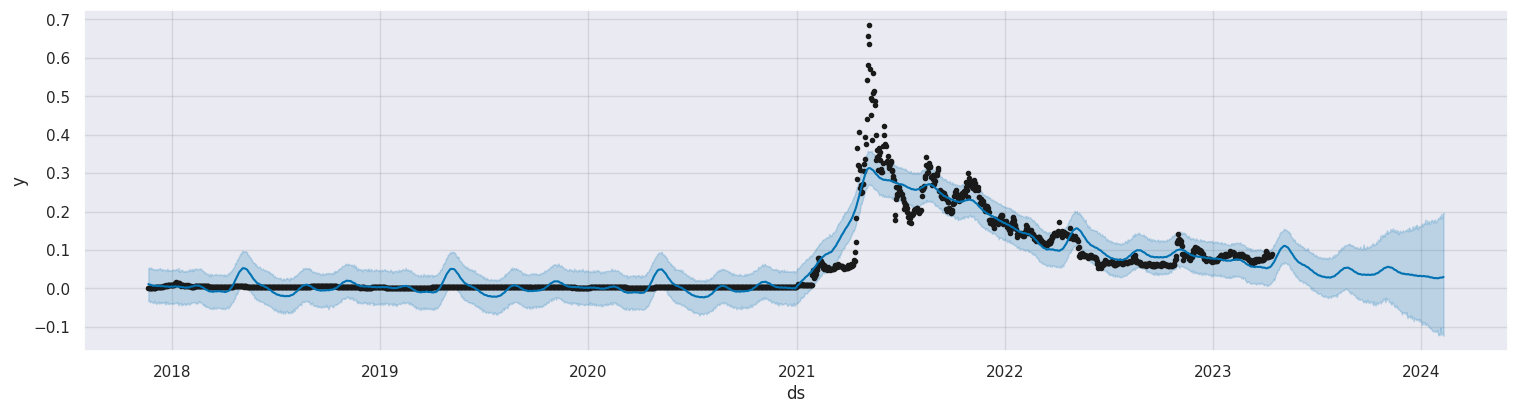

In [77]:
fig1 = prophet_basic.plot(forecast)
fig1.set_size_inches(16, 4)

fig1.savefig('prediction.png')

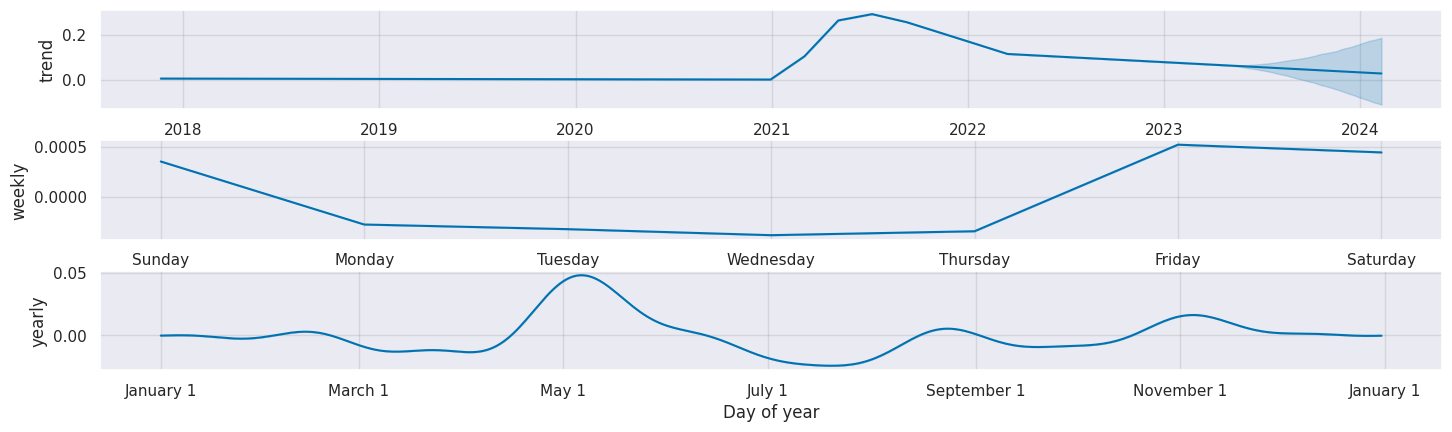

In [79]:
fig2 = prophet_basic.plot_components(forecast)
fig2.set_size_inches(16, 4)


**Adding ChangePoints to Prophet**

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred

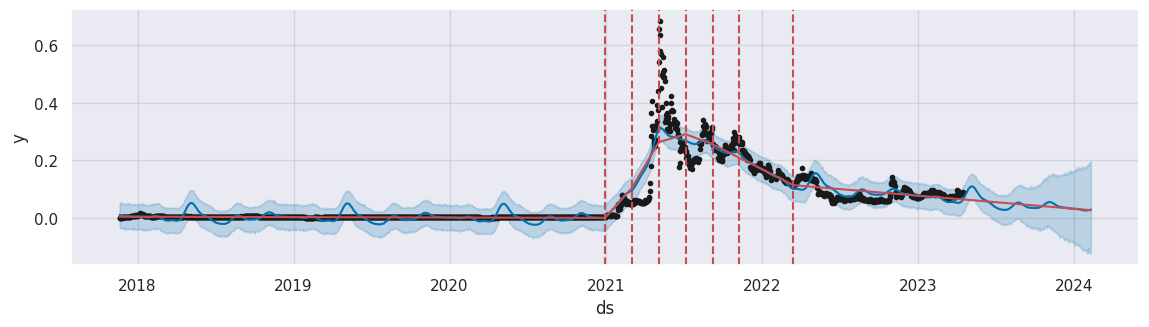

In [116]:
fig3 = prophet_basic.plot(forecast)
# the following line adds the changepoints to the the graph
a = add_changepoints_to_plot(fig3.gca(), prophet_basic, forecast)
fig3.set_size_inches(12, 3)

In [89]:
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

Change points:
 63     2018-01-22
126    2018-03-26
189    2018-05-28
252    2018-07-30
315    2018-10-01
378    2018-12-03
441    2019-02-04
504    2019-04-08
567    2019-06-10
630    2019-08-12
693    2019-10-14
756    2019-12-16
820    2020-02-18
883    2020-04-21
946    2020-06-23
1009   2020-08-25
1072   2020-10-27
1135   2020-12-29
1198   2021-03-02
1261   2021-05-04
1324   2021-07-06
1387   2021-09-07
1450   2021-11-09
1513   2022-01-11
1576   2022-03-15
Name: ds, dtype: datetime64[ns]



In [83]:
prophet_df['Open'] = data['Open']
prophet_df['High'] = data['High']
prophet_df['Low'] = data['Low']
prophet_df['Vol'] = data['Volume']

prophet_df=prophet_df.dropna()
train_X= prophet_df[:1500]
test_X= prophet_df[1500:]

<ipython-input-83-2a3581ca78be>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-2a3581ca78be>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-2a3581ca78be>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-2a3581c

In [84]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol')

In [85]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/hbeg5ugn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/vtqhamvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24153', 'data', 'file=/tmp/tmp7wkv3246/hbeg5ugn.json', 'init=/tmp/tmp7wkv3246/vtqhamvr.json', 'output', 'file=/tmp/tmp7wkv3246/prophet_modelie1flrgz/prophet_model-20230418013814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


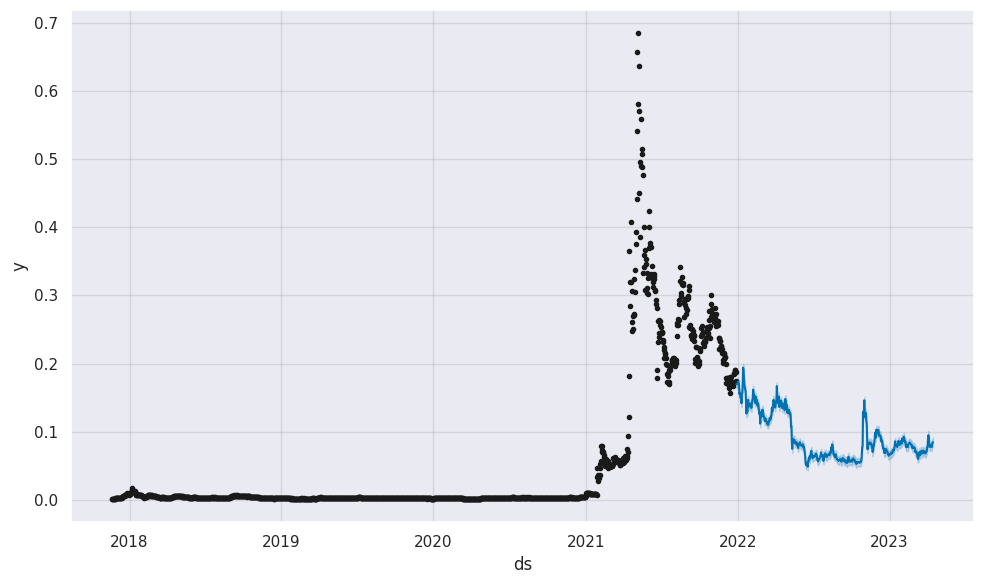

In [86]:
# Forecast the data for test data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);


In [123]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,High,High_lower,High_upper,Low,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
467,2023-04-10,0.047131,0.073554,0.085659,0.045337,0.049028,0.016876,0.016876,0.016876,0.030030,...,-0.000152,-0.000152,-0.000152,-0.000394,-0.000394,-0.000394,0.0,0.0,0.0,0.079405
468,2023-04-11,0.047125,0.073732,0.085934,0.045322,0.049029,0.017123,0.017123,0.017123,0.031289,...,-0.000310,-0.000310,-0.000310,-0.000360,-0.000360,-0.000360,0.0,0.0,0.0,0.080110
469,2023-04-12,0.047120,0.071659,0.084045,0.045310,0.049029,0.016400,0.016400,0.016400,0.029016,...,-0.000365,-0.000365,-0.000365,-0.000321,-0.000321,-0.000321,0.0,0.0,0.0,0.077417
470,2023-04-13,0.047114,0.076130,0.087962,0.045298,0.049030,0.018630,0.018630,0.018630,0.030515,...,-0.000090,-0.000090,-0.000090,-0.000277,-0.000277,-0.000277,0.0,0.0,0.0,0.082042
471,2023-04-15,0.047103,0.078353,0.091200,0.045281,0.049026,0.019784,0.019784,0.019784,0.034662,...,-0.000048,-0.000048,-0.000048,-0.000176,-0.000176,-0.000176,0.0,0.0,0.0,0.084837


6 different types of metrics are shown by each time horizon, but by taking moving average over 37 days in this case (can be changed by ‘rolling_window’ option).

# MAPE

#### The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. 
#### It is calculated as the average of the unsigned percentage error

#### Many organizations focus primarily on the MAPE when assessing forecast accuracy. 
#### Most people are comfortable thinking in percentage terms, making the MAPE easy to interpret. 
#### It can also convey information when you don’t know the item’s demand volume. 
#### For example, telling your manager, "we were off by less than 4%" is more meaningful than saying "we were off by 3,000 cases," if your manager doesn’t know an item’s typical demand volume.

---


INFO:prophet:Making 5 forecasts with cutoffs between 2019-01-08 00:00:00 and 2020-12-28 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/ajfr_2ei.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/mjgg8f5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37147', 'data', 'file=/tmp/tmp7wkv3246/ajfr_2ei.json', 'init=/tmp/tmp7wkv3246/mjgg8f5n.json', 'output', 'file=/tmp/tmp7wkv3246/prophet_modelb9x6ilgp/prophet_model-20230418053831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:38:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/37f4o9yy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wkv3246/okpys0ra.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.000001,0.001184,0.000358,0.078120,0.020095,0.092133,0.703297
1,38 days,0.000001,0.001207,0.000380,0.080969,0.020133,0.095862,0.692308
2,39 days,0.000001,0.001212,0.000391,0.084039,0.020538,0.099967,0.681319
3,40 days,0.000002,0.001263,0.000421,0.087115,0.021113,0.104076,0.673626
4,41 days,0.000002,0.001326,0.000453,0.089695,0.020538,0.107666,0.668132


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,0.000041,0.006424,0.003690,0.371303,0.038909,0.427570,0.375824
325,362 days,0.000038,0.006200,0.003580,0.370860,0.038428,0.427162,0.381319
326,363 days,0.000035,0.005908,0.003431,0.369917,0.037961,0.426801,0.383516
327,364 days,0.000034,0.005853,0.003413,0.369634,0.038909,0.427183,0.378022
328,365 days,0.000034,0.005842,0.003385,0.368908,0.038428,0.427021,0.372527


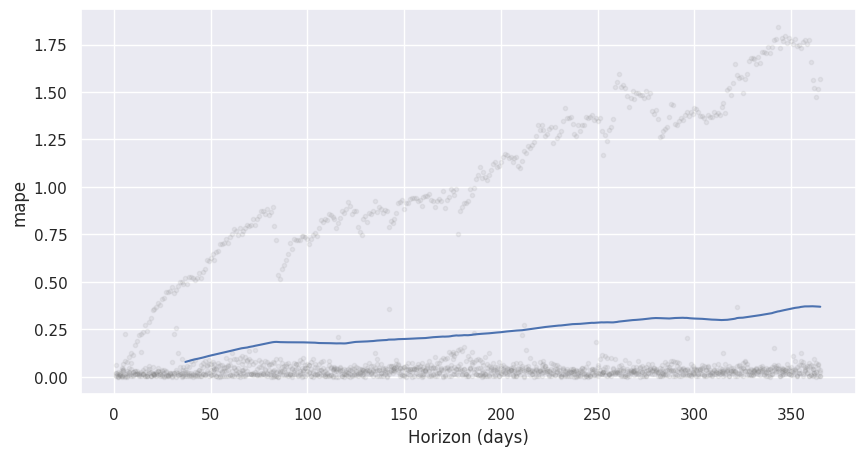

In [120]:
# Cross Validation for the data that we have
# Performance Metrics for the data that we have

# The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), 
# is a measure of prediction accuracy of a forecasting method in statistics. 
# It usually expresses the accuracy as a ratio defined by the formula: 


df_cv = cross_validation(pro_regressor, initial='366 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig4 = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
fig4.set_size_inches(10, 5)

plt.show()

In [105]:
data[(data['Date'].dt.year==2021)&(data['month']==4)&(data['Date'].dt.day>=10)&(data['Date'].dt.day<17)]

### Just look at the numbers!
    
# On 13th april 1 dogecoin was trading at 0.09$
# On 14th april 1 dogecoin went upto to a high price of 0.14$(Mark cuban tweets about doge)
# On 15th april 1 dogecoin went upto to a high price of 0.18$(Elon musk tweets about doge)
# On 16th april 1 dogecoin ended with an all time high of 0.43$, yea that's true 😱😱😱


# As of 11:10 a.m. Friday(16th april), the value of Dogecoin had jumped 203% 
#   in just the past 24 hours to 0.404(USD), according to Coinbase,
#   giving the cryptocurrency a market cap value of $52.2 billion.

# Over the past week, Dogecoin’s value has more than quintupled in value.

# Dogecoin was the seventh largest cryptocurrency in terms of market cap

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,week
1237,2021-04-10,0.061591,0.065068,0.060818,0.063845,0.063845,1.369793e+09,2021,4,14
1238,2021-04-11,0.063749,0.079243,0.063203,0.074649,0.074649,6.646627e+09,2021,4,14
1239,2021-04-12,0.074544,0.074986,0.068889,0.070767,0.070767,2.687720e+09,2021,4,15
1240,2021-04-13,0.070678,0.095181,0.070678,0.093445,0.093445,7.176815e+09,2021,4,15
1241,2021-04-14,0.094256,0.142510,0.092452,0.121517,0.121517,2.097768e+10,2021,4,15
1242,2021-04-15,0.121167,0.187326,0.120736,0.182207,0.182207,1.791662e+10,2021,4,15
1243,2021-04-16,0.181587,0.437700,0.180488,0.365870,0.365870,6.941068e+10,2021,4,15


In [106]:
data[(data['Date'].dt.year==2021)&(data['month']==5)&(data['Date'].dt.day>=1)&(data['Date'].dt.day<7)]

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,week
1258,2021-05-01,0.337559,0.397135,0.328290,0.392987,0.392987,1.012334e+10,2021,5,17
1259,2021-05-02,0.391087,0.400029,0.364874,0.376046,0.376046,8.040407e+09,2021,5,17
1260,2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,1.052665e+10,2021,5,18
1261,2021-05-04,0.440274,0.605998,0.400800,0.541334,0.541334,3.823813e+10,2021,5,18
1262,2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,4.252510e+10,2021,5,18
1263,2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,1.898990e+10,2021,5,18
